# 2. Exploratory data analysis

Sekarang setelah Anda mempelajari cara `ingest` dan `inspect` data Anda, Anda selanjutnya akan belajar cara menjelajahinya secara visual dan kuantitatif. Proses ini, dikenal sebagai *exploratory data analysis* (EDA), adalah komponen penting dari setiap proyek ilmu data. Pandas memiliki metode yang kuat yang membantu dengan EDA statistik dan visual. Dalam bab ini, Anda akan belajar bagaimana dan kapan menerapkan teknik ini.

## Visual exploratory data analysis

### Pandas line plots

Pada bab sebelumnya, Anda melihat bahwa metode `.plot()` akan menempatkan nilai Indeks pada sumbu x secara default. Dalam latihan ini, Anda akan berlatih membuat plot garis dengan kolom khusus pada sumbu x dan y.

Anda akan bekerja dengan dataset yang terdiri dari harga saham bulanan pada 2015 untuk AAPL, GOOG, dan IBM. Harga saham diperoleh dari [Yahoo Finance](http://finance.yahoo.com/). Tugas Anda adalah memplot kolom `'Month'` pada sumbu `x` dan AAPL dan harga IBM pada sumbu `y` menggunakan list nama kolom.

Jelajahi menggunakan metode seperti `.head()`, `.info()`, dan `.description()` untuk melihat nama kolom.

In [8]:
import pandas as pd

df = pd.read_csv('stock_data_build.csv')

In [9]:
df.head()

,Month,AAPL,GOOG,IBM
0,Jan,117.160004,534.522445,153.309998
1,Feb,128.460007,558.402511,161.940002
2,Mar,124.430000,548.002468,160.500000
3,Apr,125.150002,537.340027,171.289993
4,May,130.279999,532.109985,169.649994


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
Month    12 non-null object
AAPL     12 non-null float64
GOOG     12 non-null float64
IBM      12 non-null float64
dtypes: float64(3), object(1)
memory usage: 512.0+ bytes


In [11]:
df.describe()

,AAPL,GOOG,IBM
count,12.000000,12.000000,12.000000
mean,119.860835,607.954783,154.276666
std,7.563793,86.198682,11.988910
min,105.260002,520.510010,137.619995
25%,116.060003,536.635632,143.747501
50%,120.400002,583.411247,156.904999
75%,125.220002,646.909988,162.157505
max,130.279999,758.880005,171.289993


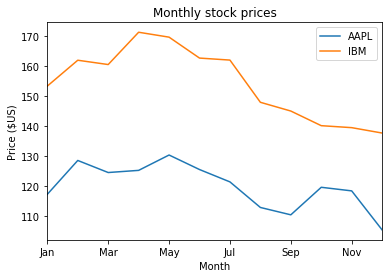

In [12]:
import matplotlib.pyplot as plt

# Create a list of y-axis column names: y_columns
y_columns = ['AAPL', 'IBM']

# Generate a line plot
df.plot(x='Month', y=y_columns)

# Add the title
plt.title('Monthly stock prices')

# Add the y-axis label
plt.ylabel('Price ($US)')

# Display the plot
plt.show()

### Pandas scatter plots

Pandas scatter plots dihasilkan menggunakan argumen kata kunci `kind='scatter'`. Scatter plots mengharuskan kolom x dan y dipilih dengan menentukan parameter `x` dan `y` di dalam `.plot()`. Scatter plots juga mengambil argumen kata kunci `s` untuk memberikan radius setiap lingkaran pada plot dalam piksel.

Dalam latihan ini, Anda akan memplot efisiensi bahan bakar (mil per galon) versus tenaga kuda untuk 392 mobil yang diproduksi dari tahun 1970 hingga 1982 dari [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Auto+MPG).

Ukuran setiap lingkaran disediakan sebagai array NumPy yang disebut `sizes`. Array ini berisi `'weight'` yang dinormalisasi dari setiap mobil dalam dataset.

In [17]:
# Load data
df = pd.read_csv('https://assets.datacamp.com/production/repositories/497/datasets/3ed265bae13db503890f98663c33ac16a041e7a3/auto-mpg.csv')

# Data 'weight' normalized 
import numpy as np

sizes = [51.12044694090751, 56.78387977107904, 49.15557237808293, 49.069773577192684, 49.528233205650345, 78.45958720041182, 78.93021696013565, 77.41479204832775, 81.52541105845661, 61.71459825281231, 52.85646224772517, 54.23007577707459, 58.89427962573241, 39.65137852200639, 23.425874729367592, 33.41639502490575, 32.039030114006266, 27.865016502899362, 18.88972580962619, 14.019695604778272, 29.726197217217525, 24.585497130917954, 23.485168208451302, 20.77938954412633, 29.194591893896952, 88.67676838407849, 79.72987327590123, 79.94866084270768, 93.23005041711455, 18.88972580962619, 21.341222425774802, 20.667922300110526, 28.886703810807123, 49.24144612333267, 46.14174741479811, 45.396313343124056, 45.01218186497903, 73.76057586034611, 82.96880195006737, 71.84547684294994, 69.85320595315599, 102.22421043467729, 93.78252358097777, 110.0, 36.528896728186645, 24.1423428060985, 44.84805371769443, 41.02504617783767, 20.5197656285485, 18.765772002604123, 17.909520204696516, 17.75442285273055, 13.088320413632303, 10.83266173598389, 14.004419446168756, 15.913289754576144, 21.605975866402215, 18.81884509985011, 21.15311208345319, 24.1423428060985, 20.630833169313693, 76.05635058819968, 80.05816704265014, 71.18975116958623, 70.98330444064256, 56.139920362155365, 89.36985382064832, 84.38736544080909, 82.6716892004421, 81.4149056003876, 22.603635179942163, 63.0684431255583, 69.92143862889674, 76.76982089055096, 69.20665680025435, 35.8171126739239, 26.251847492013503, 36.949405365713346, 19.95069228905812, 23.882373313751913, 21.796084724976907, 26.147404199912188, 19.49759118230405, 18.361368075216884, 69.9897046132417, 56.139920362155365, 66.21810474042, 68.0235143605505, 59.396440142924206, 102.1004648064316, 82.96880195006737, 79.25686195097579, 74.74521150963677, 93.34830012566427, 102.05923291798513, 60.78837340459356, 40.555894487425995, 44.73880149585913, 36.11079463731472, 37.99862639858287, 35.11233175369801, 15.831995942406394, 103.96451838786356, 100.21241653923603, 90.18186346500326, 84.2749364108465, 32.38645967387848, 21.62494928007994, 24.002184363124346, 23.56434276067768, 18.783454707868398, 22.21725537101243, 25.442710714772367, 21.360079259337766, 69.37650986388891, 76.1987781798362, 14.512929416039606, 19.38962134173114, 27.75740889339733, 34.24717406773759, 48.1026249451165, 29.459795000681318, 32.80584830958833, 55.89556844161154, 40.06360580780935, 35.039823085890774, 46.33599903102243, 15.831995942406394, 25.012267786037643, 14.034980090538841, 26.904042453330106, 59.52231335826433, 54.92349013611108, 54.35035314690607, 71.39649767596784, 91.9342499507941, 82.70879914911657, 89.56285636421445, 75.45251972020773, 20.501283516782998, 16.043792865902585, 22.025314539205745, 11.321598737301096, 16.704302487547125, 18.801145740283726, 18.501530681766567, 21.003223364471832, 25.7938541840149, 23.802665823858046, 16.65430210904026, 44.35746794046843, 49.815853003073485, 49.04119063119804, 41.52318884464565, 90.7252433799149, 82.079062514194, 84.23747672182773, 90.29816462020621, 63.55551900861481, 63.230593574467434, 57.92740995321655, 59.64831980802133, 38.452789217096395, 43.19643408681433, 41.812961210616365, 19.623934881678753, 28.996476479583333, 35.354568577874, 27.972832291177763, 30.39744886372239, 20.575261926751356, 26.96758277945162, 37.0735423700586, 15.621606307438416, 42.928632908900966, 30.21771563536163, 36.40567571045738, 36.11079463731472, 29.70395123317537, 13.415144438220107, 25.278299444351923, 20.5197656285485, 27.54281821072234, 21.171885645505608, 20.188361670880706, 73.97101962179593, 73.09614831413042, 65.35749367893534, 73.97101962179593, 43.51889468424957, 46.80945169495375, 37.77255673817924, 39.62568509742766, 17.242303062877557, 19.49759118230405, 15.621606307438416, 13.415144438220107, 55.49963322684675, 53.183332071643775, 55.317368544565404, 42.44868923072265, 13.867308740480553, 16.48817544550258, 19.33574883798392, 27.3931001983376, 41.313078169238, 64.63368105497435, 44.52069675543914, 35.74387954397493, 60.75655952398977, 79.87569834516798, 68.46177648412542, 62.357454314221265, 58.706519023755085, 17.412176944389767, 19.33574883798392, 13.867308740480553, 22.025314539205745, 15.750910309013005, 62.680131417583915, 68.63071356114399, 71.3620191070266, 76.8055818407546, 51.5883662129631, 48.84134316946509, 54.86301836515315, 51.73502816091084, 74.14661841965813, 72.22648147587398, 77.88228247210404, 78.24284811276476, 15.670032854395979, 31.258459628457658, 21.360079259337766, 31.601642341292067, 17.514500976547716, 17.926794879559118, 16.40542438189829, 19.968924586291994, 32.99310928250239, 28.145770564278035, 30.803797180880863, 16.40542438189829, 13.489984708322607, 16.40542438189829, 17.84050477675665, 13.489984708322607, 47.145102499659345, 58.082815409771534, 53.06435373737679, 52.028976593135404, 41.44433488773487, 36.60292926463685, 30.803797180880863, 48.98404972066193, 42.90189859044043, 47.56635225362988, 39.24128298687338, 54.5611591394268, 48.41447258853275, 48.84134316946509, 49.41341844691062, 42.76835190540356, 69.30854365698193, 19.33574883798392, 27.28640857545156, 22.025314539205745, 20.705044739511575, 26.335552014413537, 31.372645687292767, 33.93740821208497, 24.082224939060396, 33.34566004027314, 41.05118926857334, 32.5259561083438, 48.41447258853275, 16.48817544550258, 18.97851405774501, 43.84255439143666, 37.22278157125771, 34.774599161228785, 44.38465192508592, 47.00510227255522, 61.39441929476602, 57.77221267543793, 65.12675248679012, 61.075073051825164, 79.14790534300292, 68.42801405017487, 54.109931641659976, 64.63368105497435, 15.428649563203077, 16.240546791018794, 15.268768262956291, 29.68171357628428, 51.88189828763494, 63.327983769625575, 42.368960922951146, 48.698844797044615, 20.15170555193871, 19.24612787475965, 16.989053581431968, 18.88972580962619, 29.68171357628428, 28.037621689957454, 30.352465593725874, 27.201205165861712, 19.138857514875323, 16.125627942890887, 18.71277384971763, 16.972236899877363, 29.85984799164257, 34.29495526048843, 37.54716157701101, 47.594502187769685, 19.932468318975307, 30.60028577268392, 26.904042453330106, 24.666503656376324, 21.360079259337766, 18.53665460491453, 32.6424321337189, 18.53665460491453, 18.099999621493133, 22.700750579115507, 36.233516025980705, 43.97776650668443, 14.249837242047573, 19.15671509031174, 14.172915184181441, 35.25757392239095, 24.383563717845842, 26.0223470453754, 21.834206422504508, 25.814584626565125, 28.908641690260254, 28.580447849323985, 30.917150524610516, 23.68335440354888, 12.823916713349181, 14.637570213023663, 12.897091553240775, 17.75442285273055, 16.240546791018794, 17.497426153310425, 16.40542438189829, 20.42743834123151, 17.412176944389767, 23.58415721661191, 19.968924586291994, 20.335319232690882, 22.993345849293707, 28.471466259897948, 28.908641690260254, 43.43816711835153, 41.57579978500811, 35.01567018425714, 35.74387954397493, 48.5565546034005, 57.77221267543793, 38.98605580705234, 49.98882458477797, 28.254127617374973, 29.018455994791744, 23.882373313751913, 27.607107980438766, 26.545396220987445, 31.144481748398913, 34.17556473224425, 16.32288149707036, 17.073261896470804, 16.158420263743587, 18.801145740283726, 18.801145740283726, 19.425577979984556, 20.24340830292661, 20.984524746778906, 16.076501915244737, 16.076501915244737, 16.571134687883237, 36.11079463731472, 37.84783834728763, 27.821948477645382, 33.463593317082776, 29.570650199094615, 23.38638737906706, 36.233516025980705, 32.40968826174506, 18.88972580962619, 21.929656391466942, 28.68963761752638, 30.803797180880863]
sizes = np.array(sizes)

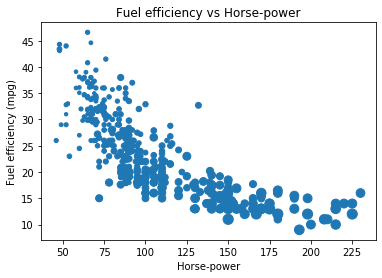

In [18]:
# Generate a scatter plot
df.plot(kind='scatter', x='hp', y='mpg', s=sizes)

# Add the title
plt.title('Fuel efficiency vs Horse-power')

# Add the x-axis label
plt.xlabel('Horse-power')

# Add the y-axis label
plt.ylabel('Fuel efficiency (mpg)')

# Display the plot
plt.show()

**Note** : Seperti yang Anda harapkan, mobil dengan tenaga kuda yang lebih tinggi kurang hemat bahan bakar.

### Pandas box plots

Sementara pandas dapat memplot banyak kolom data dalam satu gambar, membuat plot yang berbagi sumbu x dan y yang sama, ada kasus di mana dua kolom tidak dapat diplot bersama karena unit mereka tidak cocok. Metode `.plot()` dapat menghasilkan subplot untuk setiap kolom yang diplot. Di sini, setiap plot akan diskalakan secara independen.

Dalam latihan ini, tugas Anda adalah membuat box plots untuk efisiensi bahan bakar (mpg) dan bobot dari kumpulan data mobil. Untuk melakukan ini dalam satu angka, Anda akan menentukan `subplot=True` di dalam `.plot()` untuk menghasilkan dua plot terpisah.

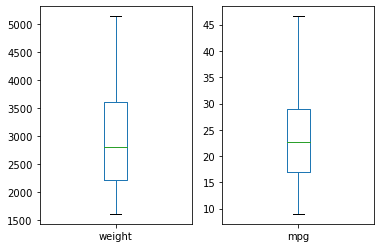

In [20]:
# Make a list of the column names to be plotted: cols
cols = ['weight', 'mpg']

# Generate the box plots
df[cols].plot(kind='box', subplots=True)

# Display the plot
plt.show()

**Note** : Box plots adalah cara yang bagus untuk memvisualisasikan statistik ringkasan yang penting.

### Pandas hist, pdf and cdf

Pandas bergantung pada metode `.hist()` untuk tidak hanya menghasilkan histogram, tetapi juga plot dari *probability density functions (PDFs)* dan *cumulative density functions (CDFs)*.

Dalam latihan ini, Anda akan bekerja dengan kumpulan data yang terdiri dari tagihan restoran yang mencakup jumlah tip pelanggan.

Dataset asli disediakan oleh [Seaborn package](https://github.com/mwaskom/seaborn-data/blob/master/tips.csv).

Tugas Anda adalah memplot PDF dan CDF untuk kolom `fraction` dari kumpulan data tips. Kolom ini berisi informasi tentang fraksi apa dari total tagihan yang terdiri dari tip.

Ingat, ketika memplot PDF, Anda perlu menentukan `normed=True` dalam panggilan Anda ke `.hist()`, dan ketika memplot CDF, Anda perlu menentukan `cumulative=True` dan tambahan `normed=True`.

In [22]:
df = pd.read_csv('tips_build.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size,fraction
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


**Note** : `normed=True` is depreciated , change to `density=True`

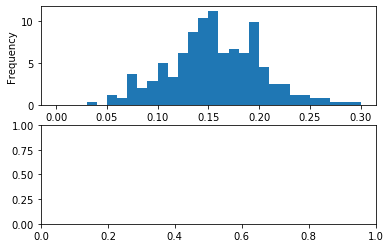

In [29]:
# This formats the plots such that they appear on separate rows
fig, axes = plt.subplots(nrows=2, ncols=1)

# Plot the PDF
df.fraction.plot(ax=axes[0], kind='hist', bins=30, density=True, range=(0,.3))
plt.show()

# Plot the CDF
df.fraction.plot(ax=axes[1], kind='hist', bins=30, cumulative=True, density=True, range=(0,.3))
plt.show()

## Statistical exploratory data analysis

### Fuel efficiency

Dari kumpulan data mobil, nilai mana yang sesuai dengan nilai median kolom `'mpg'`? Tugas Anda adalah memilih kolom `'mpg'` dan memanggil metode `.median()`.

In [30]:
df = pd.read_csv('https://assets.datacamp.com/production/repositories/497/datasets/3ed265bae13db503890f98663c33ac16a041e7a3/auto-mpg.csv')

df.mpg.median()

22.75

**Note** : Median adalah statistik yang sangat berguna, terutama jika terdapat outlier, ketika lebih kuat dari rata-rata.

### Bachelor's degrees awarded to women

Dalam latihan ini, Anda akan menyelidiki statistik persentase gelar Sarjana yang diberikan kepada wanita dari tahun 1970 hingga 2011. Data dicatat setiap tahun untuk 17 bidang yang berbeda. Kumpulan data ini diperoleh dari [Digest of Education Statistics](http://nces.ed.gov/programs/digest/2013menu_tables.asp).

Tugas Anda adalah menghitung nilai minimum dan maksimum kolom `'Engineering'` dan menghasilkan plot garis dari nilai rata-rata semua 17 bidang akademik per tahun. Untuk melakukan langkah ini, Anda akan menggunakan metode `.mean()` dengan argumen kata kunci `axis='columns'`. Ini menghitung rata-rata di semua kolom per baris.

In [37]:
df = pd.read_csv('https://assets.datacamp.com/production/repositories/497/datasets/5f4f1a9bab95fba4d7fea1ad3c30dcab8f5b9c96/percent-bachelors-degrees-women-usa.csv', index_col='Year')
df.head()

,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
Year,,,,,,,,,,,,,,,,,
1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3


0.8
19.0


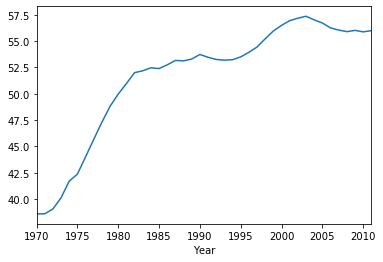

In [38]:
# Print the minimum value of the Engineering column
print(df['Engineering'].min())

# Print the maximum value of the Engineering column
print(df['Engineering'].max())

# Construct the mean percentage per year: mean
mean = df.mean(axis='columns')

# Plot the average percentage per year
mean.plot()

# Display the plot
plt.show()

**Note** : Sepertinya ada kecenderungan yang meningkat sejak tahun 1970.

### Median vs mean

Dalam banyak dataset, mungkin ada perbedaan besar dalam nilai rata-rata dan median karena adanya outlier.

Dalam latihan ini, Anda akan menyelidiki harga tarif rata-rata, median, dan maks yang dibayarkan oleh penumpang di Titanic dan menghasilkan box plots dari harga tarif. Kumpulan data ini diperoleh dari [Vanderbilt University](http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic.html).

In [39]:
df = pd.read_csv('https://assets.datacamp.com/production/repositories/497/datasets/e280ed94bf4539afb57d8b1cbcc14bcf660d3c63/titanic.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: fare, dtype: float64


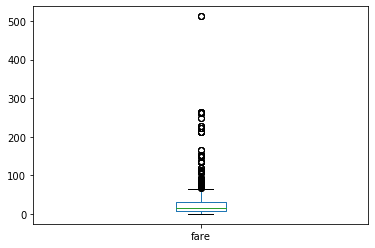

In [41]:
# Print summary statistics of the fare column with .describe()
print(df['fare'].describe())

# Generate a box plot of the fare column
df.fare.plot(kind='box')

# Show the plot
plt.show()

**Note** : Di sini Anda dapat melihat mengapa median adalah statistik yang lebih informatif dengan adanya outliers.

### Quantiles

Dalam latihan ini, Anda akan menyelidiki probabilitas harapan hidup di negara-negara di seluruh dunia. Dataset ini berisi harapan hidup untuk orang yang lahir setiap tahun dari tahun 1800 hingga 2015. Karena nama negara berubah atau hasilnya tidak dilaporkan, tidak setiap negara memiliki nilai. Dataset ini diperoleh dari [Gapminder](https://docs.google.com/a/continuum.io/spreadsheets/d/1dgOdlUEq6_V55OHZCxz5BG_0uoghJTeA6f83br5peNs/pub?range=A1:D70&gid=1&output=html#).

Pertama, Anda akan menentukan jumlah negara yang dilaporkan pada tahun 2015. Ada total 260 negara unik di seluruh dataset. Kemudian, Anda akan menghitung persentil harapan hidup ke-5 dan ke-95 atas seluruh dataset. Akhirnya, Anda akan membuat satu box plot harapan hidup setiap 50 tahun dari 1800 hingga 2000. Perhatikan perubahan besar dalam distribusi selama periode ini.

In [42]:
# Load data
df = pd.read_csv('https://assets.datacamp.com/production/repositories/497/datasets/162a52b5c1991182d67391cf650bfffb33a47f54/life_expectancy_at_birth.csv')
df.head()

,Unnamed: 0,Life expectancy,1800,1801,1802,1803,1804,1805,1806,1807,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
2,2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10
4,4,Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,75.3,75.5,75.7,76.0,76.1,76.2,76.3,76.3,76.4,76.50


208
      Unnamed: 0   1800   1801   1802  1803  1804   1805   1806   1807  1808  \
0.05       12.95  25.40  25.30  25.20  25.2  25.2  25.40  25.40  25.40  25.3   
0.95      246.05  37.92  37.35  38.37  38.0  38.3  38.37  38.37  38.37  38.0   

      ...   2007   2008    2009    2010   2011    2012    2013   2014    2015  \
0.05  ...  53.07  53.60  54.235  54.935  55.97  56.335  56.705  56.87  57.855   
0.95  ...  80.73  80.93  81.200  81.365  81.60  81.665  81.830  82.00  82.100   

         2016  
0.05  59.2555  
0.95  82.1650  

[2 rows x 218 columns]


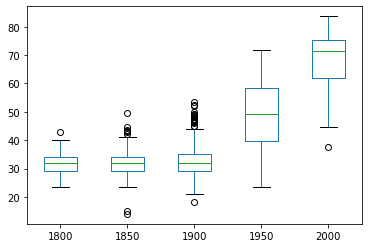

In [43]:
# Print the number of countries reported in 2015
print(df['2015'].count())

# Print the 5th and 95th percentiles
print(df.quantile([0.05, 0.95]))

# Generate a box plot
years = ['1800','1850','1900','1950','2000']
df[years].plot(kind='box')
plt.show()

**Note** : Sepertinya secara keseluruhan, harapan hidup terus meningkat sejak 1900.

### Standard deviation of temperature

Mari kita gunakan mean dan standar deviasi untuk mengeksplorasi perbedaan distribusi suhu di Pittsburgh pada 2013. Data telah diperoleh dari [Weather Underground](https://www.wunderground.com/history/).

Dalam latihan ini, Anda akan membandingkan distribusi suhu harian di bulan Januari dan Maret. Anda akan menghitung mean dan standar deviasi selama dua bulan ini. Anda akan melihat bahwa sementara nilai rata-rata serupa, standar deviasi sangat berbeda, yang berarti bahwa satu bulan memiliki fluktuasi suhu yang lebih besar daripada yang lain.

In [46]:
# Load data
january = pd.read_csv('weather_jan.csv')
march = pd.read_csv('weather_mar.csv')

In [47]:
# Print the mean of the January and March data
print(january.mean(), march.mean())

# Print the standard deviation of the January and March data
print(january.std(), march.std())

Temperature    32.354839
dtype: float64 Temperature    35.0
dtype: float64
Temperature    13.583196
dtype: float64 Temperature    7.478859
dtype: float64


## Separating populations

### Filtering and counting

Berapa banyak mobil yang diproduksi di Asia dalam dataset automobil? DataFrame telah disediakan untuk Anda sebagai `df`. Gunakan pemfilteran dan metode `.count()` untuk menentukan jumlah baris tempat kolom `'origin'` memiliki nilai `'Asia'`.

Sebagai contoh, Anda dapat mengekstrak baris yang berisi `'US'` sebagai negara asal menggunakan `df[df['origin'] == 'US']`.

In [48]:
# Load data automobil
df = pd.read_csv('https://assets.datacamp.com/production/repositories/497/datasets/3ed265bae13db503890f98663c33ac16a041e7a3/auto-mpg.csv')

In [49]:
df[df['origin'] == 'Asia'].count()

mpg       79
cyl       79
displ     79
hp        79
weight    79
accel     79
yr        79
origin    79
name      79
dtype: int64

**Note** : Dalam dataset ini, 79 mobil diproduksi di Asia.

### Separate and summarize

Mari kita gunakan pemfilteran populasi untuk menentukan bagaimana mobil di AS berbeda dari rata-rata global dan standar deviasi. Bagaimana distribusi efisiensi bahan bakar (MPG) untuk AS berbeda dari rata-rata global dan standar deviasi?

Dalam latihan ini, Anda akan menghitung mean dan standar deviasi semua kolom dalam dataset automobile lengkap. Selanjutnya, Anda akan menghitung jumlah yang sama hanya untuk populasi AS dan mengurangi nilai global dari nilai AS.

In [51]:
# Compute the global mean and global standard deviation: global_mean, global_std
global_mean = df.mean()
global_std = df.std()

# Filter the US population from the origin column: us
us = df[df['origin'] == 'US']

# Compute the US mean and US standard deviation: us_mean, us_std
us_mean = us.mean()
us_std = us.std()

# Print the differences
print(us_mean - global_mean)
print(us_std - global_std)

mpg        -3.412449
cyl         0.805612
displ      53.100255
hp         14.579592
weight    394.905612
accel      -0.551122
yr         -0.387755
dtype: float64
mpg       -1.364623
cyl       -0.049788
displ     -6.267657
hp         1.406630
weight   -54.055870
accel     -0.022844
yr        -0.023369
dtype: float64


**Note** : Menariknya, sepertinya mobil AS berbobot lebih dari rata-rata global.

### Separate and plot

Pemfilteran populasi dapat digunakan bersamaan dengan perencanaan untuk menentukan dengan cepat perbedaan distribusi antar sub-populasi. Anda akan bekerja dengan dataset Titanic.

Ada tiga kelas penumpang di Titanic, dan penumpang di setiap kelas membayar harga tarif yang berbeda. Dalam latihan ini, Anda akan menyelidiki perbedaan harga tarif ini.

Tugas Anda adalah menggunakan filter Boolean dan membuat box plot dari harga ongkos untuk masing-masing dari tiga kelas penumpang. Harga tarif tercantum dalam kolom `'fare'` dan informasi kelas penumpang tercantum dalam kolom `'pclass'`.

Setelah selesai, perhatikan bagian box plot yang berbeda dan yang serupa.

In [52]:
# Load data
titanic = pd.read_csv('https://assets.datacamp.com/production/repositories/497/datasets/e280ed94bf4539afb57d8b1cbcc14bcf660d3c63/titanic.csv')
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


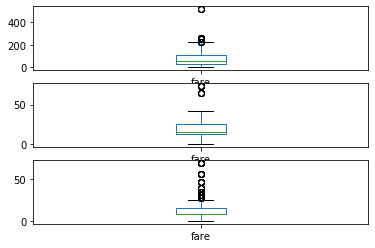

In [55]:
import matplotlib.pyplot as plt

# Display the box plots on 3 separate rows and 1 column
fig, axes = plt.subplots(nrows=3, ncols=1)

# Generate a box plot of the fare prices for the First passenger class
titanic.loc[titanic['pclass'] == 1].plot(ax=axes[0], y='fare', kind='box')

# Generate a box plot of the fare prices for the Second passenger class
titanic.loc[titanic['pclass'] == 2].plot(ax=axes[1], y='fare', kind='box')

# Generate a box plot of the fare prices for the Third passenger class
titanic.loc[titanic['pclass'] == 3].plot(ax=axes[2], y='fare', kind='box')

# Display the plot
plt.show()

**Note** : Tidak mengherankan, penumpang di kelas satu memiliki tarif tertinggi.